#  Telco Customer Churn
### Focused customer retention programs


Data and content can be referred to Kaggle:
<br>https://www.kaggle.com/blastchar/telco-customer-churn

### 1. Preparation

In [167]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


In [168]:
data=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [169]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

Total there are 7043 records, 21 columns 

In [171]:
data.isnull().values.any()

False

There is no missing data

SeniorCitizen shows whether the customer is a senior citizen or not (1, 0). Should be classified as categorical data.

In [172]:
data['SeniorCitizen']=data['SeniorCitizen'].astype('object')

TotalCharges shows the total amount charged to the customer. Should be classified as float data.

In [173]:
data['TotalCharges']=data['TotalCharges'].astype('float64')

ValueError: could not convert string to float: 

There seem a problem here. Let's have a look

In [174]:
np.isnan(pd.to_numeric(data['TotalCharges'],errors='coerce')).value_counts()

False    7032
True       11
Name: TotalCharges, dtype: int64

Let's dig in details for those 11 records

In [175]:
data['TotalCharges_NonNumeric']=np.isnan(pd.to_numeric(data['TotalCharges'],errors='coerce'))

In [176]:
data[data['TotalCharges_NonNumeric']==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_NonNumeric
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No,True
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No,True
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,No,Yes,Yes,Two year,No,Mailed check,80.85,,No,True
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No,True
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No,True
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No,True
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No,True
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No,True
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No,True
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,No,Two year,No,Mailed check,73.35,,No,True


For simplicity, those 11 records will be deleted from dataset.

In [177]:
data.drop(data[data.TotalCharges_NonNumeric==True].index,inplace=True)

In [178]:
np.isnan(pd.to_numeric(data['TotalCharges'],errors='coerce')).value_counts()

False    7032
Name: TotalCharges, dtype: int64

In [179]:
data['TotalCharges']=data['TotalCharges'].astype('float64')
data.drop('TotalCharges_NonNumeric',axis=1,inplace=True)

### 2. Summarize

In [180]:
data.describe(include=[np.number])

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [181]:
data.describe(exclude=[np.number])

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,4439-JMPMT,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,5890,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


### 3. Visualize data
Visualize data for better understanding

####  Demographic 

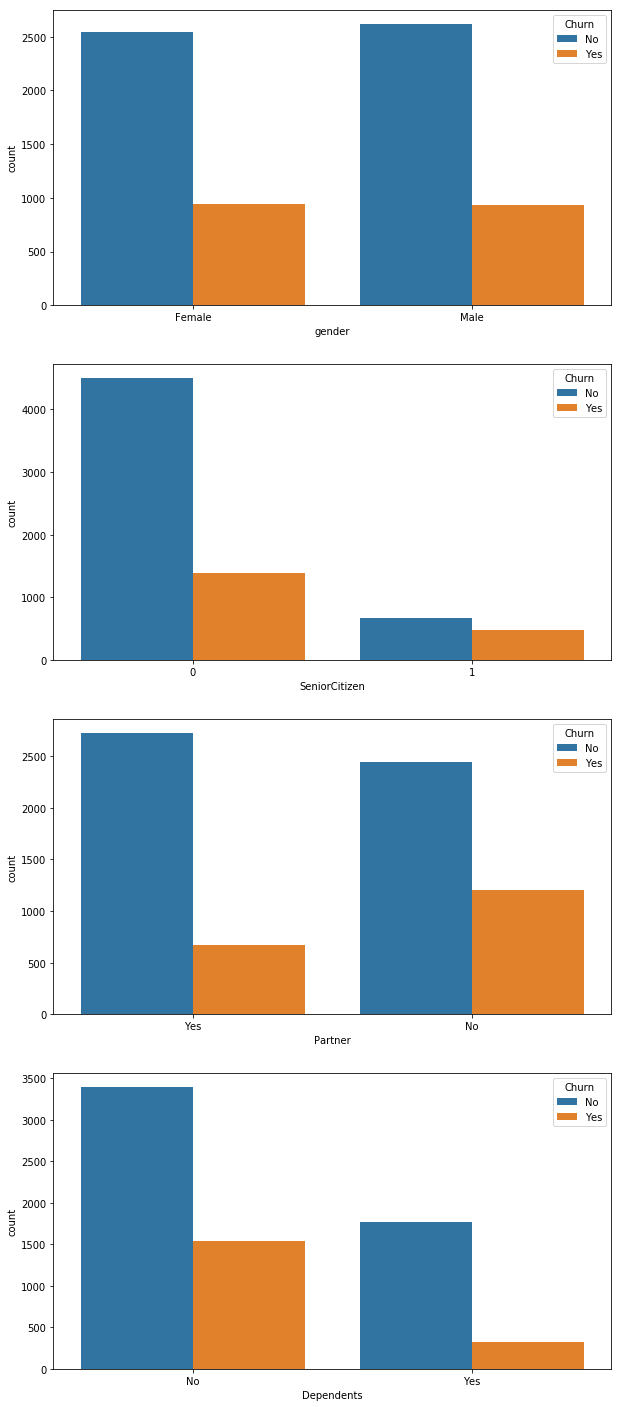

In [182]:
f, ax = plt.subplots(4, figsize=(10, 25))
sns.countplot(x='gender',hue="Churn", data=data, ax=ax[0])
sns.countplot(x='SeniorCitizen',hue="Churn", data=data, ax=ax[1])
sns.countplot(x='Partner',hue="Churn", data=data, ax=ax[2])
sns.countplot(x='Dependents',hue="Churn", data=data, ax=ax[3])

Preliminary finding:
1. Gender seems not a factor for determining whether churn or not 
2. About 50% of senior citizens churn 
3. People without pertner have a high probability to churn 
4. People without dependents have a high probability to churn 

#### Services


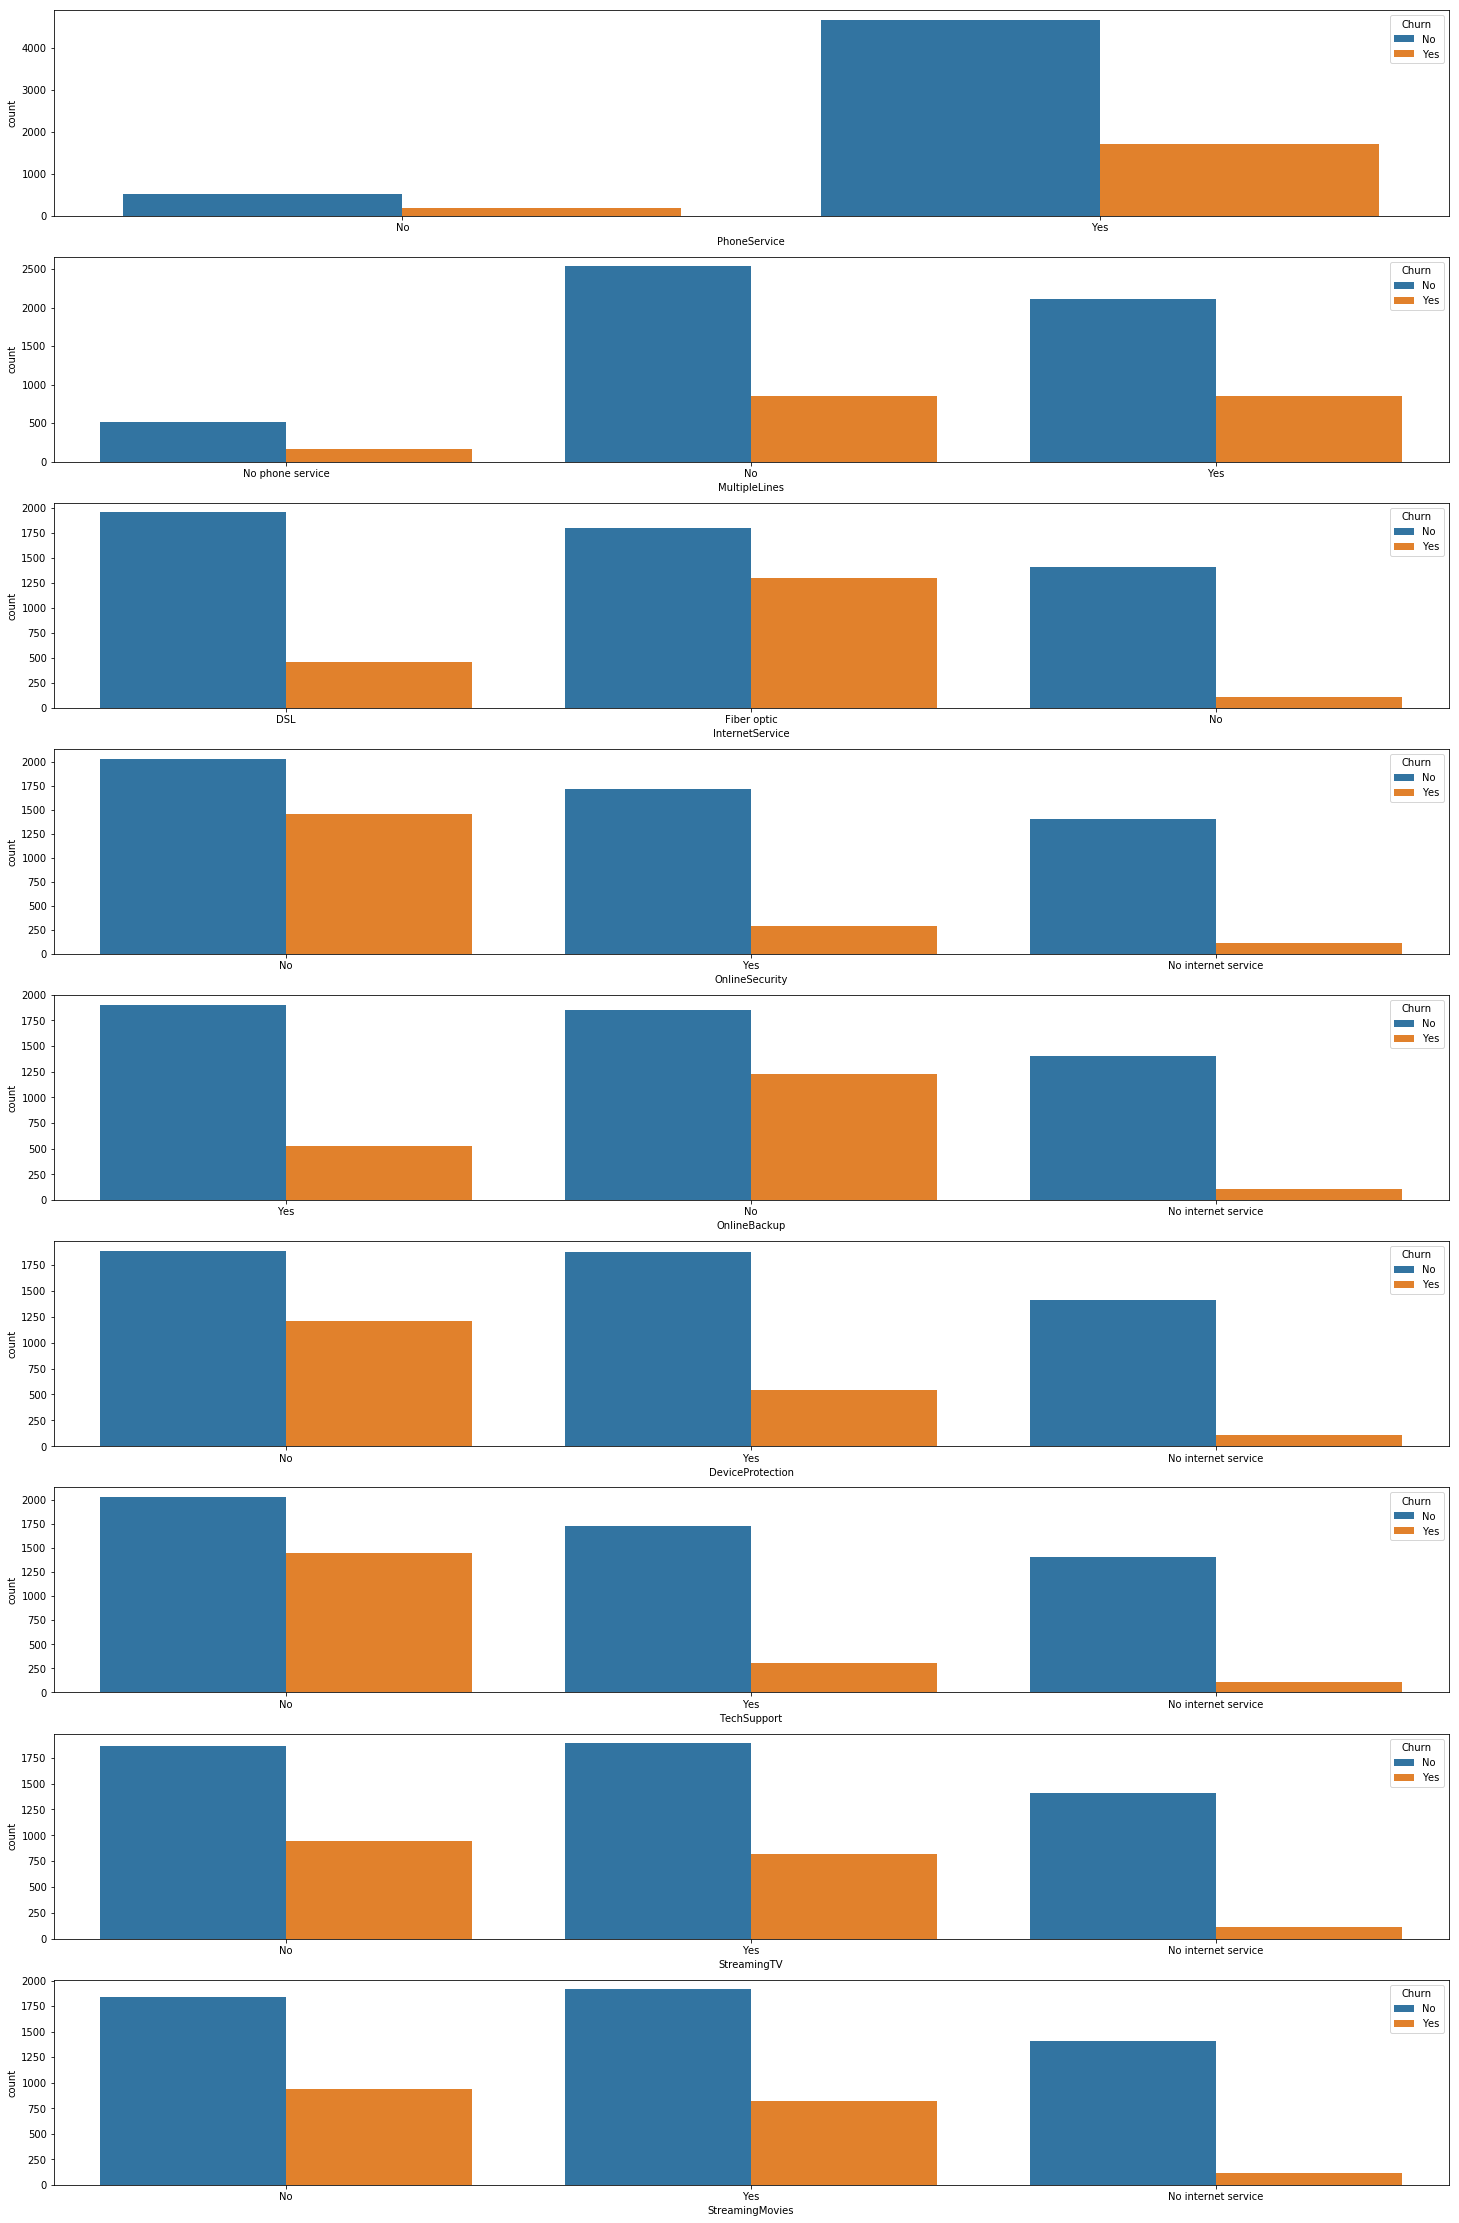

In [183]:
f, ax = plt.subplots(9, figsize=(25, 40))
sns.countplot(x='PhoneService',hue="Churn", data=data, ax=ax[0])
sns.countplot(x='MultipleLines',hue="Churn", data=data, ax=ax[1])
sns.countplot(x='InternetService',hue="Churn", data=data, ax=ax[2])
sns.countplot(x='OnlineSecurity',hue="Churn", data=data, ax=ax[3])
sns.countplot(x='OnlineBackup',hue="Churn", data=data, ax=ax[4])
sns.countplot(x='DeviceProtection',hue="Churn", data=data, ax=ax[5])
sns.countplot(x='TechSupport',hue="Churn", data=data, ax=ax[6])
sns.countplot(x='StreamingTV',hue="Churn", data=data, ax=ax[7])
sns.countplot(x='StreamingMovies',hue="Churn", data=data, ax=ax[8])

#### Numeric variables

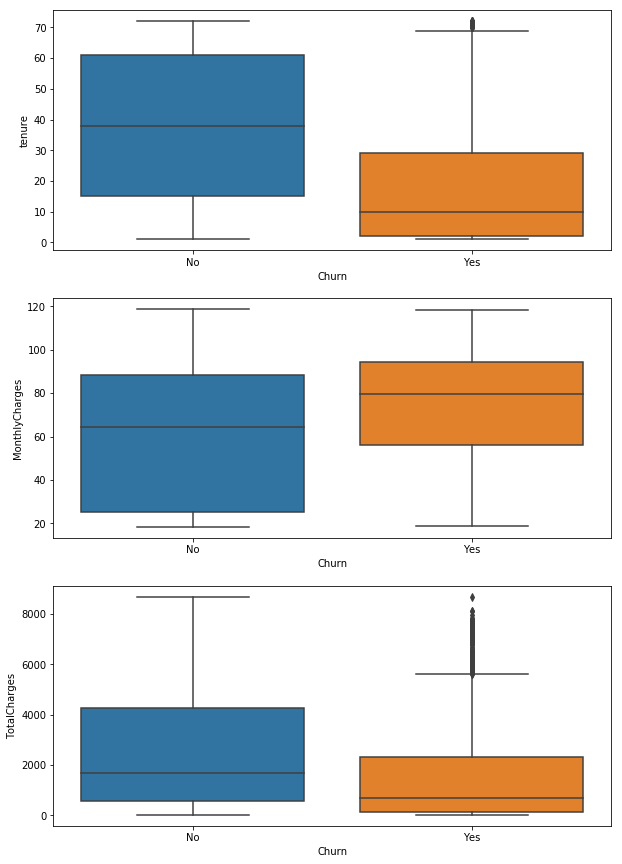

In [184]:
f, ax = plt.subplots(3, figsize=(10, 15))
sns.boxplot(y='tenure',x='Churn',data=data,ax=ax[0])
sns.boxplot(y='MonthlyCharges',x='Churn',data=data,ax=ax[1])
sns.boxplot(y='TotalCharges',x='Churn',data=data,ax=ax[2])

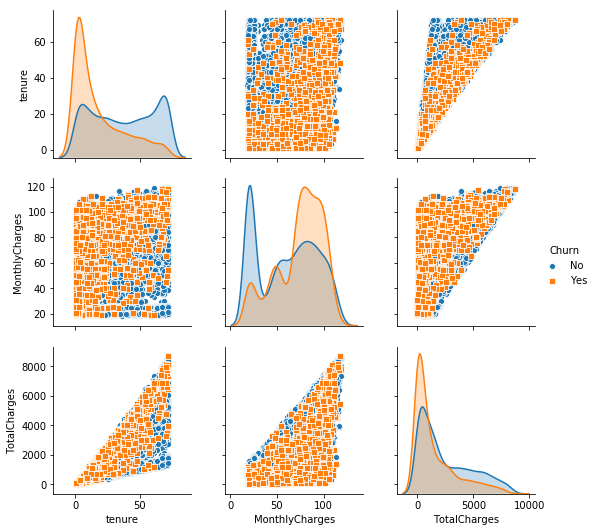

In [185]:
sns.pairplot(data[['tenure','MonthlyCharges','TotalCharges','Churn']],hue='Churn',markers=["o", "s"])

Preliminary finding:
1. The higher tenure is, the lower chance of churning will be  
2. Higher charges may cause higher chance of churning 

### 4. Data cleaning

customerID is an unique identifier. No predictive power. Can be deleted 

In [186]:
del data['customerID']

Next step is to trim down dataset.
<br> There are some variables that is a subset of other variables. eg:
<br>PhoneServiceWhether the customer has a phone service or not (Yes, No)
<br>MultipleLinesWhether the customer has multiple lines or not (Yes, No, No phone service)



In [187]:
pd.crosstab(index=data['PhoneService'],columns=data['MultipleLines'])

MultipleLines,No,No phone service,Yes
PhoneService,,,
No,0,680,0
Yes,3385,0,2967


In [188]:
pd.crosstab(index=data['InternetService'],columns=data['OnlineSecurity'])

OnlineSecurity,No,No internet service,Yes
InternetService,,,
DSL,1240,0,1176
Fiber optic,2257,0,839
No,0,1520,0


In [189]:
pd.crosstab(index=data['InternetService'],columns=data['OnlineBackup'])

OnlineBackup,No,No internet service,Yes
InternetService,,,
DSL,1334,0,1082
Fiber optic,1753,0,1343
No,0,1520,0


In [190]:
pd.crosstab(index=data['InternetService'],columns=data['DeviceProtection'])

DeviceProtection,No,No internet service,Yes
InternetService,,,
DSL,1355,0,1061
Fiber optic,1739,0,1357
No,0,1520,0


In [191]:
pd.crosstab(index=data['InternetService'],columns=data['TechSupport'])

TechSupport,No,No internet service,Yes
InternetService,,,
DSL,1242,0,1174
Fiber optic,2230,0,866
No,0,1520,0


In [192]:
pd.crosstab(index=data['InternetService'],columns=data['StreamingTV'])

StreamingTV,No,No internet service,Yes
InternetService,,,
DSL,1463,0,953
Fiber optic,1346,0,1750
No,0,1520,0


In [193]:
pd.crosstab(index=data['InternetService'],columns=data['StreamingMovies'])

StreamingMovies,No,No internet service,Yes
InternetService,,,
DSL,1436,0,980
Fiber optic,1345,0,1751
No,0,1520,0


Therefore PhoneService and InternetService are redundent. Can be deleted.

In [194]:
del data['PhoneService']
del data['InternetService']

Create dummy variables for categorical columns

In [195]:
category_variable = list(data.select_dtypes(include='object').columns.values)

In [196]:
category_variable

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

Need to keep Churn from category_variable 

In [197]:
category_variable.remove('Churn')

In [198]:
for i in category_variable:
    data_category=pd.get_dummies(data[i])
    data_category = data_category.add_prefix("{}#".format(i))
    data.drop(i,axis=1, inplace=True)
    data=data.join(data_category)

Final dataset:

In [199]:
data.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender#Female,gender#Male,SeniorCitizen#0,SeniorCitizen#1,Partner#No,Partner#Yes,...,StreamingMovies#Yes,Contract#Month-to-month,Contract#One year,Contract#Two year,PaperlessBilling#No,PaperlessBilling#Yes,PaymentMethod#Bank transfer (automatic),PaymentMethod#Credit card (automatic),PaymentMethod#Electronic check,PaymentMethod#Mailed check
0,1,29.85,29.85,No,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,No,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,Yes,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,No,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,Yes,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [200]:
data.shape

(7032, 42)

There are 7032 records with 42 variables

### 5. Modelling

First is to create train set and test set 

In [201]:
learning_data = data.drop('Churn',axis=1)
learning_target = data['Churn']
X_train,X_test,y_train,y_test = train_test_split(learning_data,learning_target,test_size=0.3,random_state=42)

#### 5.1 Random Forest Classifier

In [202]:
random_forest_model = RandomForestClassifier(n_estimators=100,min_samples_leaf=50)

In [203]:
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [204]:
random_forest_model.score(X_test,y_test)

0.7933649289099526

80% of accuracy. Not bad
<br>Let's have a look on confusion matrix

In [205]:
y_predict=random_forest_model.predict(X_test)

In [206]:
confusion_matrix(y_test,y_predict)

array([[1423,  126],
       [ 310,  251]], dtype=int64)

In [207]:
C00,C01,C10,C11=confusion_matrix(y_test,y_predict).ravel()

In [208]:
print('Precision: {0}'.format(C11/(C11+C01)))

Precision: 0.6657824933687002


In [209]:
print('Recall: {0}'.format(C11/(C11+C10)))

Recall: 0.4474153297682709


Next step, let's see if there are any variables that are more predictive than others 

In [210]:
variables_scores = pd.DataFrame(random_forest_model.feature_importances_, index=X_test.columns, columns=["scores"])

In [211]:
variables_scores.sort_values(by='scores',ascending=False).head(10)

,scores
Contract#Month-to-month,0.206896
tenure,0.151746
TechSupport#No,0.084816
OnlineSecurity#No,0.074517
MonthlyCharges,0.074495
TotalCharges,0.071022
PaymentMethod#Electronic check,0.057297
Contract#Two year,0.040872
OnlineBackup#No,0.036101
Contract#One year,0.022144


Among the top 10 variables, 3 are related to contract period. Apparently contract period can predict whether the customer will churn.
<br> Second most important variable is tenure. This matches with previous preliminary finding. 

<br>

#### 5.2 Logistic Regression

In [212]:
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [213]:
log_reg.score(X_test,y_test)

0.7938388625592417

Only 79%. Slightly worse than random forest classifier. 

In [214]:
y_predict=log_reg.predict(X_test)

In [215]:
confusion_matrix(y_test,y_predict)

array([[1373,  176],
       [ 259,  302]], dtype=int64)

In [216]:
C00,C01,C10,C11=confusion_matrix(y_test,y_predict).ravel()

In [217]:
print('Precision: {0}'.format(C11/(C11+C01)))

Precision: 0.6317991631799164


In [218]:
print('Recall: {0}'.format(C11/(C11+C10)))

Recall: 0.5383244206773619
